In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

from transforms3d.taitbryan import euler2quat
from sim import Simulation
from riekf import RIEKF
import numpy as np

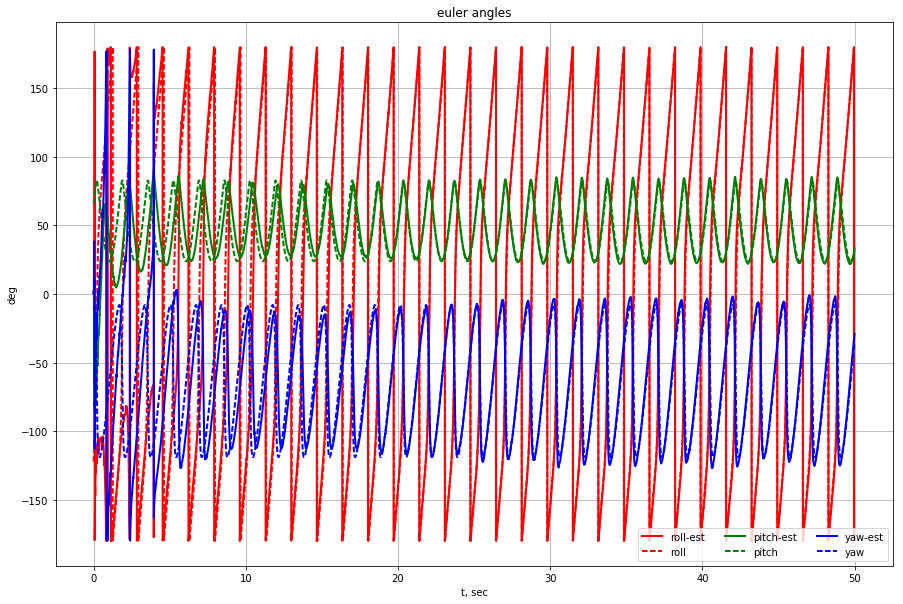

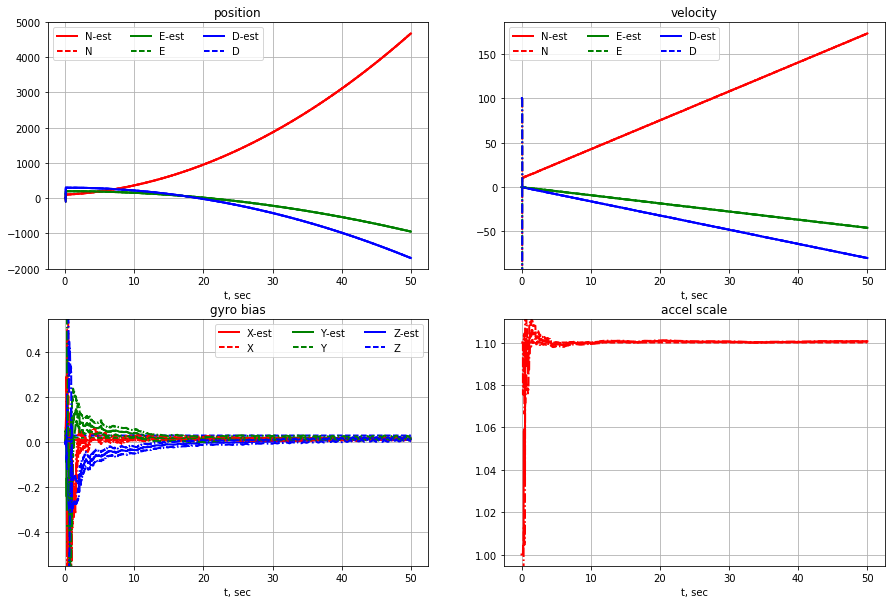

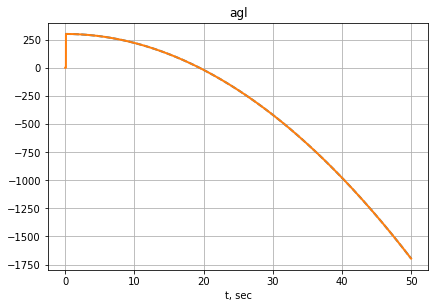

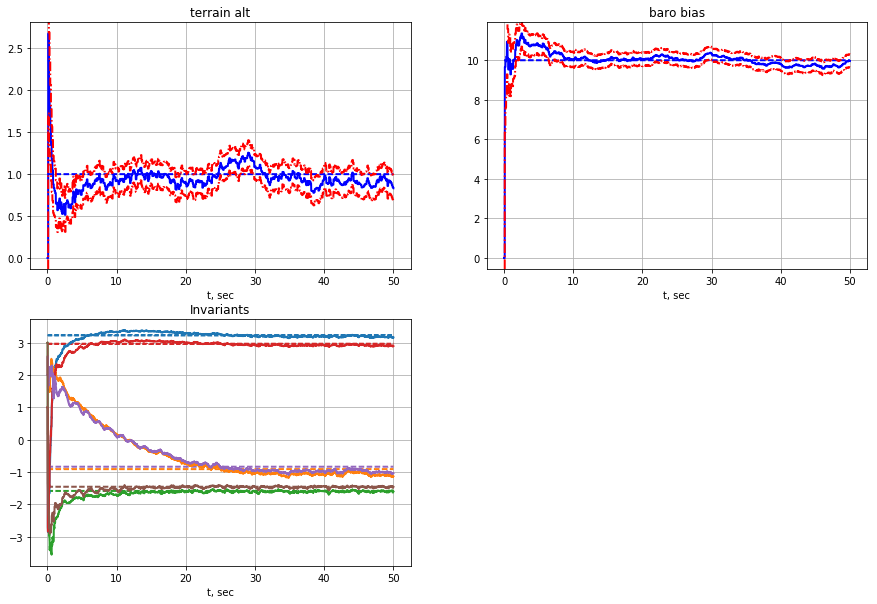

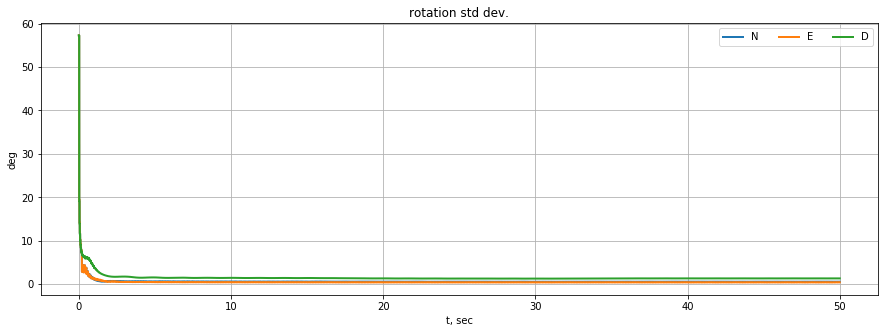

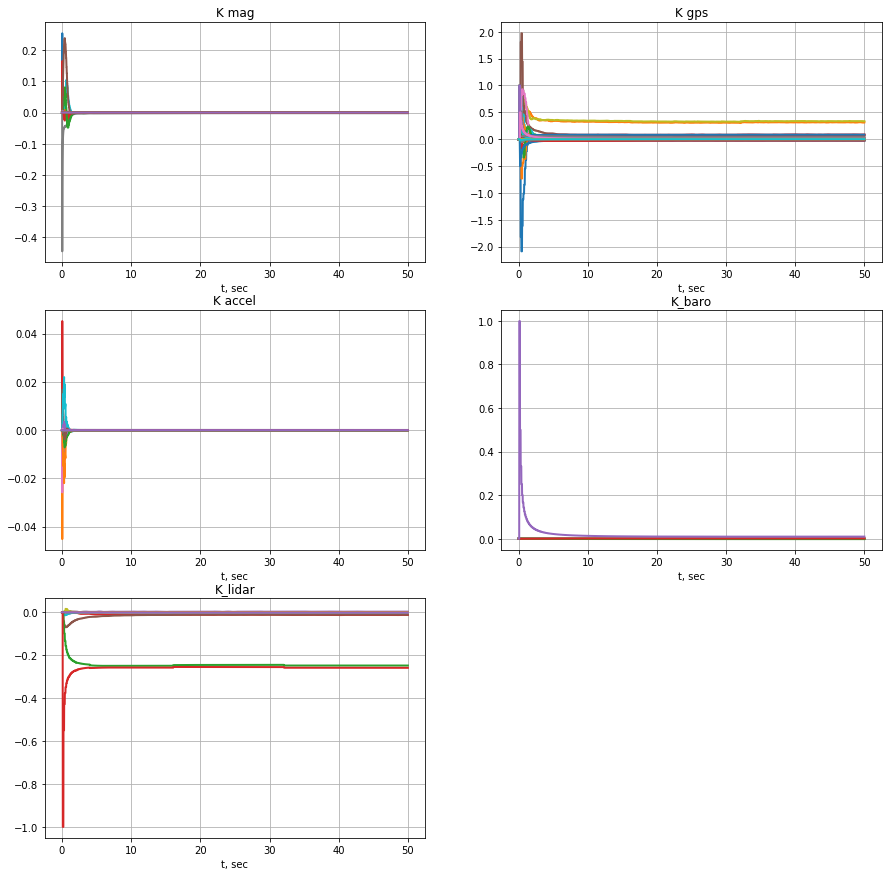

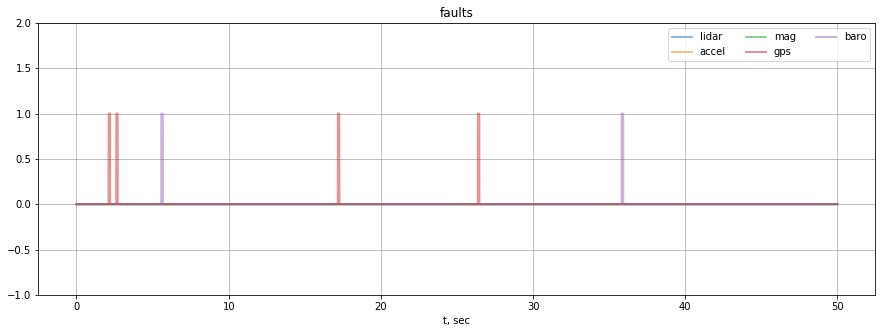

In [2]:
omega_nb_b = [1, 2, 3]
a_b = [1, 2, 3]

# Estimator setup
P0 = np.diag([
    1, 1, 1,  # rot
    100, 100, 100,  # vel
    1, 1, 1,  # gyro bias
    1e-1,  # accel scale
    100, 100, 100,  # position
    100,  # terrain
    100,  # baro bias
    ])**2
Q = np.diag([
    1e-2, 1e-2, 1e-2,  # rot
    1e-2, 1e-2, 1e-2,  # vel
    1e-4, 1e-4, 1e-4,  # gyro bias
    1e-6,  # accel scale
    1e-2, 1e-2, 1e-1,  # position
    1e-1,  # terrain
    1e-1,  # baro bias
    ])**2

q0 = euler2quat(3, 2, 1)
x0 = [
    q0[0], q0[1], q0[2], q0[3],  # attitude
    10, 0, 0,  # velocity
    0.01, 0.02, 0.03,  # gyro bias
    1.1,  # accel scale
    100.0, 200.0, 300.0,  # position
    1.0,  # terrain alittude
    10.0,  # baro bias
    ]
qh0 = euler2quat(0, 0, 0)
xh0 = [
    qh0[0], qh0[1], qh0[2], qh0[3],  # attitude
    0, 0, 0,  # velocity
    0, 0, 0,  # gyro bias
    1.0,  # accel scale
    0, 0, 0,  # position
    0,  # terrain alittude
    0,  # baro bias
    ]
#xh0 = x0

riekf = RIEKF(xh0, P0, Q)
riekf.set_mag_field(0.0, 0)

# Simulation
sim = Simulation()
sim.set_mag_field(1.0, 0)

dt = 1.0/250
dt_est = 1.0/50
tf = 50

data_riekf = sim.simulate(
    omega_nb_b=omega_nb_b, a_b=a_b, x0=x0, est=riekf,
    dt=dt, dt_est=dt_est, tf=tf)
data_riekf.analysis()
plt.show()